In [1]:
import pandas as pd

In [2]:
# df = pd.read_csv("Test_Short_leads.csv")
df = pd.read_csv("Short4_leads.csv")  # Short3_leads.csv: lead_notes.csv 와 leads.csv를 합치고 도움안되는 열을 지운것

# df = df.drop('Unnamed: 0', axis=1)
df['Note'].fillna('', inplace=True)

# 특정 조건을 만족하는 행을 찾아 3배로 복사하기
cod = (df['Status_Text'] == 'Converted')
select = df[cod].copy()  # 'Converted'인 행을 복사하여 새로운 데이터프레임 생성

# 복사된 행을 원래 데이터프레임에 2번 추가 (원본 포함 총 3번)
df = pd.concat([df] + [select] * 2, ignore_index=True)

df = df.drop(df[df['Status_Text'] == '0'].index)
df['Status_Text'] = df['Status_Text'].map({'Closed': 2, 'Unqualified': 1, 'Converted': 4, 'Qualified': 3, 'Sales Rejected': 0})

df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).fillna('')
df[df.select_dtypes(include=['float64']).columns] = df.select_dtypes(include=['float64']).fillna(0)

df

,Name,Contact_Information_Job_Title,Source_Text,Status_Text,Start_Date,Owner_Party_Name,Sales_Unit_Name,Sales_Territory_Name,Note
0,High Speed Rotary Application,Owner,Sales,4,7/22/2017,Linda Burnett,TSS West,NCA - TSS West,Customer Emailed Matt Cole regarding a new hig...
1,Back-up Ring,,Sales,4,7/25/2017,Robert Mcpherson,TSS West,NCA - TSS West,Name: Contact_First_Name Contact_Last_Name\nEm...
2,Holding Ring Samples,Engineer,Sales,1,7/25/2017,Todd Conley,TSS West,NCA - TSS West,First name: Contact_First_Name\nLast name: Con...
3,Metric O-Rings,Purchasing,Sales,2,7/25/2017,Linda Burnett,TSS West,NCA - TSS West,8/1/2017: sent customer to a distributor\n\nMe...
4,Multiple Parts,Material Planner,Sales,2,7/25/2017,Cole Price,TSS West,NCA - TSS West,First name: Contact_First_Name\nLast name: Con...
...,...,...,...,...,...,...,...,...,...
90948,Web Request H&M Website-H&M Target Account,Engineer,Website Contact Form,4,2023-04-11,Bryan Livingston,,HM -TSS Healthcare & Medical Europe,12th April 2023\nInvitation for a call was sen...
90949,Web Request H&M Website,CEO,Website Contact Form,4,2023-09-27,Matthew Reese,,HM -TSS Healthcare & Medical Minneapolis,\n What are you looking for? : A custom medic...
90950,Web Request,Purchaser,Website Contact Form,4,2023-10-10,Kenneth Smith,TSS Singapore,SGID -Indonesia,"Hi, I look for Variseal TVM301600-T24S Trelleb..."
90951,Web Request TSS Albany,Engineer,Website Contact Form,4,2023-10-10,Crystal Cantrell,TSS Italy,ILS - Life Science,"Hi Nicola, \nI recommend to get in touch with ..."


In [3]:
df['Status_Text'].value_counts()

Status_Text
2    53538
4    18291
1    14402
3     3789
0      933
Name: count, dtype: int64

In [4]:
df

,Name,Contact_Information_Job_Title,Source_Text,Status_Text,Start_Date,Owner_Party_Name,Sales_Unit_Name,Sales_Territory_Name,Note
0,High Speed Rotary Application,Owner,Sales,4,7/22/2017,Linda Burnett,TSS West,NCA - TSS West,Customer Emailed Matt Cole regarding a new hig...
1,Back-up Ring,,Sales,4,7/25/2017,Robert Mcpherson,TSS West,NCA - TSS West,Name: Contact_First_Name Contact_Last_Name\nEm...
2,Holding Ring Samples,Engineer,Sales,1,7/25/2017,Todd Conley,TSS West,NCA - TSS West,First name: Contact_First_Name\nLast name: Con...
3,Metric O-Rings,Purchasing,Sales,2,7/25/2017,Linda Burnett,TSS West,NCA - TSS West,8/1/2017: sent customer to a distributor\n\nMe...
4,Multiple Parts,Material Planner,Sales,2,7/25/2017,Cole Price,TSS West,NCA - TSS West,First name: Contact_First_Name\nLast name: Con...
...,...,...,...,...,...,...,...,...,...
90948,Web Request H&M Website-H&M Target Account,Engineer,Website Contact Form,4,2023-04-11,Bryan Livingston,,HM -TSS Healthcare & Medical Europe,12th April 2023\nInvitation for a call was sen...
90949,Web Request H&M Website,CEO,Website Contact Form,4,2023-09-27,Matthew Reese,,HM -TSS Healthcare & Medical Minneapolis,\n What are you looking for? : A custom medic...
90950,Web Request,Purchaser,Website Contact Form,4,2023-10-10,Kenneth Smith,TSS Singapore,SGID -Indonesia,"Hi, I look for Variseal TVM301600-T24S Trelleb..."
90951,Web Request TSS Albany,Engineer,Website Contact Form,4,2023-10-10,Crystal Cantrell,TSS Italy,ILS - Life Science,"Hi Nicola, \nI recommend to get in touch with ..."


In [5]:
for i in range(0, 9):
    print(df.columns[i])

Name
Contact_Information_Job_Title
Source_Text
Status_Text
Start_Date
Owner_Party_Name
Sales_Unit_Name
Sales_Territory_Name
Note


In [6]:
def create_sentence(df):
        return "Project Name is {}. Job is {}. I find this at {}. Lead Start Date is {}. Owner Party name is {}. Our sales unit is {}, and territory is {}. Here is our note. {}".format(
        df['Name'],
        df['Contact_Information_Job_Title'],
        df['Source_Text'],
        df['Start_Date'],
        df['Owner_Party_Name'],
        df['Sales_Unit_Name'],
        df['Sales_Territory_Name'],
        df['Note']
    )

In [7]:
df['New_Column'] = df.apply(create_sentence, axis=1)
t_df = df[['Status_Text', 'New_Column']].copy()
t_df = t_df.rename(columns={'Status_Text': 'Status'})
t_df = t_df.rename(columns={'New_Column': 'Text'})

# 행을 무작위로 섞기
t_df = t_df.sample(frac=1, random_state=42)  # random_state는 재현 가능성을 위한 시드값, 원하는 값으로 설정

In [8]:
t_df

,Status,Text
62274,2,Project Name is Trelleborg ConneX - Future Pol...
11732,2,Project Name is Web Request. Job is Purchasing...
39382,2,Project Name is Seal Helper Chatbot Contact Re...
53449,2,Project Name is Web Request. Job is Engineer. ...
61454,1,Project Name is Web Request. Job is Purchasing...
...,...,...
6265,0,Project Name is Accessories for surgical retra...
54886,2,Project Name is Member Registration Upload. Jo...
76820,1,Project Name is Web Request. Job is Engineer. ...
860,4,Project Name is MEDTEC 2018_ Lead 30_ Jimmy. J...


In [9]:
random_value = t_df['Text'].sample().values[0]

print(random_value)

Project Name is Web Request. Job is Técnico Robotista. I find this at Website Contact Form. Lead Start Date is 2021-05-18. Owner Party name is Antonio Murphy. Our sales unit is , and territory is BR - TSS Brazil. Here is our note. Sento to be attended by Hidramave.


In [10]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90953 entries, 62274 to 15795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Status  90953 non-null  int64 
 1   Text    90953 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


In [11]:
# t_df.to_csv("t_df.csv")

In [12]:
# # '컬럼1' 값이 1인 행을 선택하고 해당 열 값을 가져오기
# filtered_rows = t_df[t_df['Status'] == 1]
# selected_column_values = filtered_rows['Text'].sample().values[0]

# print(selected_column_values)

In [13]:
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import random
import time
import datetime

from tqdm import tqdm

In [14]:
import os

n_devices = torch.cuda.device_count()
print(n_devices)

for i in range(n_devices):
    print(torch.cuda.get_device_name(i))

1
NVIDIA GeForce RTX 3080


In [15]:
# train과 test 세트로 데이터 나누기 (test_size는 테스트 세트의 비율을 나타냄)
X_train, X_test, y_train, y_test = train_test_split(t_df['Text'], t_df['Status'], test_size=0.25, random_state=42)

# 나뉜 데이터로 새로운 데이터프레임 생성
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [16]:
print(train.shape)
print(test.shape)

(68214, 2)
(22739, 2)


In [17]:
document_bert = ["[CLS] " + str(s) + " [SEP]" for s in train['Text']]
document_bert[:5]

['[CLS] Project Name is Nitrogen gas spring_EC team_20190123_05. Job is . I find this at Sales. Lead Start Date is 4/1/2019. Owner Party name is Lisa White. Our sales unit is TSS China, and territory is ECG - East China Growth. Here is our note. 专业生产氮气弹簧 [SEP]',
 '[CLS] Project Name is Virtual Conference Europe Attendee - Nov 2020. Job is Engineer. I find this at Conference. Lead Start Date is 2020-12-01. Owner Party name is Robert Leon. Our sales unit is Trelleborg Sealing Solutions Norway AS, and territory is N19 - Vest Agder. Here is our note. Frequent contact with customer and part of the R&D team. Contact and no new opportunity on this case for now. [SEP]',
 '[CLS] Project Name is Member Registration. Job is Engineer. I find this at Web Member Registration. Lead Start Date is 2020-05-12. Owner Party name is Kenneth Smith. Our sales unit is TSS Singapore, and territory is SGSG - SINGAPORE INDUSTRIAL. Here is our note. \n This new contact from an existing priority account has regist

In [18]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
tokenized_texts = [tokenizer.tokenize(s) for s in document_bert]
print(tokenized_texts[0])

['[CLS]', 'Project', 'Name', 'is', 'Ni', '##tro', '##gen', 'gas', 'spring', '_', 'EC', 'team', '_', '2019', '##01', '##23', '_', '05', '.', 'Job', 'is', '.', 'I', 'find', 'this', 'at', 'Sales', '.', 'Lead', 'Start', 'Date', 'is', '4', '/', '1', '/', '2019', '.', 'Own', '##er', 'Party', 'name', 'is', 'Lisa', 'White', '.', 'Our', 'sales', 'unit', 'is', 'TS', '##S', 'China', ',', 'and', 'territory', 'is', 'EC', '##G', '-', 'East', 'China', 'Growth', '.', 'Here', 'is', 'our', 'note', '.', '专', '业', '生', '产', '氮', '气', '弹', '簧', '[SEP]']


In [19]:
MAX_LEN = 200
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype='long', truncating='post', padding='post')
input_ids[0]

array([  101, 14300, 15729, 10124, 30409, 14239, 11280, 16091, 26053,
         168, 27364, 11121,   168, 19493, 77966, 74171,   168, 10831,
         119, 48955, 10124,   119,   146, 17860, 10531, 10160, 48514,
         119, 48860, 27172, 29897, 10124,   125,   120,   122,   120,
       19493,   119, 42965, 10165, 12529, 11324, 10124, 19589, 12136,
         119, 18465, 23857, 16511, 10124, 72218, 10731, 11593,   117,
       10111, 24399, 10124, 27364, 11447,   118, 11830, 11593, 68093,
         119, 18249, 10124, 17446, 19864,   119,  2084,  2090,  5600,
        2168,  4864,  4853,  3730,  6124,   102,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [20]:
attention_masks = []

for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

print(attention_masks[0])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [21]:
train_inputs, validation_inputs, train_labels, validation_labels = \
train_test_split(input_ids, train['Status'].values, random_state=42, test_size=0.1)

train_masks, validation_masks, _, _ = train_test_split(attention_masks,
                                                       input_ids,
                                                       random_state=42,
                                                       test_size=0.1)

In [22]:
train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)
validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(validation_labels)
validation_masks = torch.tensor(validation_masks)

In [23]:
BATCH_SIZE = 32

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=BATCH_SIZE)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=BATCH_SIZE)

In [24]:
sentences = test['Text']
sentences = ["[CLS] " + str(sentence) + " [SEP]" for sentence in sentences]
labels = test['Status'].values

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

attention_masks = []
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

test_inputs = torch.tensor(input_ids)
test_labels = torch.tensor(labels)
test_masks = torch.tensor(attention_masks)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = RandomSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=BATCH_SIZE)

In [25]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 3080


In [26]:
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=5)
model.cuda()
# model

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [27]:
# 옵티마이저 설정
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 학습률
                  eps = 1e-8 # 0으로 나누는 것을 방지하기 위한 epsilon 값
                )

# 에폭수
epochs = 20

# 총 훈련 스텝
total_steps = len(train_dataloader) * epochs

# lr 조금씩 감소시키는 스케줄러
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

c:\ProgramData\Anaconda3\envs\aicoss3\Lib\site-packages\transformers\optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [28]:
# 정확도 계산 함수
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# 시간 표시 함수
def format_time(elapsed):
    # 반올림
    elapsed_rounded = int(round((elapsed)))
    # hh:mm:ss으로 형태 변경
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [29]:
# 재현을 위해 랜덤시드 고정
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# 훈련과 검증 중에 손실과 정확도를 저장할 리스트
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# 그래디언트 초기화
model.zero_grad()

# 에폭만큼 반복
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # 시작 시간 설정
    t0 = time.time()

    # 로스 초기화
    total_loss = 0
    total_correct = 0
    total_count = 0

    # 훈련모드로 변경
    model.train()

    # 훈련모드로 변경
    model.train()

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for step, batch in tqdm(enumerate(train_dataloader), total=len(train_dataloader), desc=f"Epoch {epoch_i + 1}/{epochs}"):
        # 경과 정보 표시
        if step % 500 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print(f'  Batch {step:>5,}  of  {len(train_dataloader):>5,}.    Elapsed: {elapsed}.')

        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)

        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        # Forward 수행
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask,
                        labels=b_labels)

        # 로스 구함
        loss = outputs[0]

        # 총 로스 계산
        total_loss += loss.item()

        logits = outputs[1]
        predictions = torch.argmax(logits, dim=1)
        total_correct += torch.sum(predictions == b_labels).item()
        total_count += len(b_labels)

        # Backward 수행으로 그래디언트 계산
        loss.backward()

        # 그래디언트 클리핑
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # 그래디언트를 통해 가중치 파라미터 업데이트
        optimizer.step()

        # 스케줄러로 학습률 감소
        scheduler.step()

        # 그래디언트 초기화
        model.zero_grad()

    # 평균 로스 및 정확도 계산
    avg_train_loss = total_loss / len(train_dataloader)
    avg_train_accuracy = total_correct / total_count
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Average training accuracy: {0:.2%}".format(avg_train_accuracy))
    print("  Training epoch took: {:}".format(format_time(time.time() - t0)))

    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    #시작 시간 설정
    t0 = time.time()

    # 평가모드로 변경
    model.eval()

    # 변수 초기화
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for batch in validation_dataloader:
        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)

        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        # 그래디언트 계산 안함
        with torch.no_grad():
            # Forward 수행
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask,
                            labels=b_labels)  # labels를 추가하여 손실을 계산하도록 수정

        # 로스 구함
        loss = outputs.loss

        # CPU로 데이터 이동
        logits = outputs.logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # 출력 로짓과 라벨을 비교하여 정확도 계산
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

        # 검증 손실 계산
        eval_loss += loss.item()

    # 평균 정확도 및 손실 계산
    avg_val_accuracy = eval_accuracy / nb_eval_steps
    avg_val_loss = eval_loss / len(validation_dataloader)
    val_accuracies.append(avg_val_accuracy)
    val_losses.append(avg_val_loss)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation Accuracy: {0:.2%}".format(avg_val_accuracy))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 20 ========
Training...


Epoch 1/20:  26%|██▌       | 500/1919 [02:25<06:48,  3.47it/s]

  Batch   500  of  1,919.    Elapsed: 0:02:25.


Epoch 1/20:  52%|█████▏    | 1000/1919 [04:49<04:28,  3.42it/s]

  Batch 1,000  of  1,919.    Elapsed: 0:04:50.


Epoch 1/20:  78%|███████▊  | 1500/1919 [07:15<02:03,  3.41it/s]

  Batch 1,500  of  1,919.    Elapsed: 0:07:15.


Epoch 1/20: 100%|██████████| 1919/1919 [09:16<00:00,  3.45it/s]



  Average training loss: 0.70
  Average training accuracy: 72.63%
  Training epoch took: 0:09:16

Running Validation...
  Validation Loss: 0.53
  Validation Accuracy: 78.95%
  Validation took: 0:00:20

======== Epoch 2 / 20 ========
Training...


Epoch 2/20:  26%|██▌       | 500/1919 [02:24<06:49,  3.46it/s]

  Batch   500  of  1,919.    Elapsed: 0:02:25.


Epoch 2/20:  52%|█████▏    | 1000/1919 [04:49<04:24,  3.47it/s]

  Batch 1,000  of  1,919.    Elapsed: 0:04:50.


Epoch 2/20:  78%|███████▊  | 1500/1919 [07:14<02:01,  3.46it/s]

  Batch 1,500  of  1,919.    Elapsed: 0:07:15.


Epoch 2/20: 100%|██████████| 1919/1919 [09:16<00:00,  3.45it/s]



  Average training loss: 0.50
  Average training accuracy: 80.29%
  Training epoch took: 0:09:16

Running Validation...
  Validation Loss: 0.49
  Validation Accuracy: 81.53%
  Validation took: 0:00:20

======== Epoch 3 / 20 ========
Training...


Epoch 3/20:  26%|██▌       | 500/1919 [02:25<06:51,  3.45it/s]

  Batch   500  of  1,919.    Elapsed: 0:02:25.


Epoch 3/20:  52%|█████▏    | 1000/1919 [04:49<04:26,  3.45it/s]

  Batch 1,000  of  1,919.    Elapsed: 0:04:50.


Epoch 3/20:  78%|███████▊  | 1500/1919 [07:15<02:01,  3.46it/s]

  Batch 1,500  of  1,919.    Elapsed: 0:07:15.


Epoch 3/20: 100%|██████████| 1919/1919 [09:16<00:00,  3.45it/s]



  Average training loss: 0.40
  Average training accuracy: 84.33%
  Training epoch took: 0:09:16

Running Validation...
  Validation Loss: 0.46
  Validation Accuracy: 83.11%
  Validation took: 0:00:20

======== Epoch 4 / 20 ========
Training...


Epoch 4/20:  26%|██▌       | 500/1919 [02:24<06:53,  3.43it/s]

  Batch   500  of  1,919.    Elapsed: 0:02:25.


Epoch 4/20:  52%|█████▏    | 1000/1919 [04:49<04:24,  3.47it/s]

  Batch 1,000  of  1,919.    Elapsed: 0:04:50.


Epoch 4/20:  78%|███████▊  | 1500/1919 [07:14<02:01,  3.44it/s]

  Batch 1,500  of  1,919.    Elapsed: 0:07:15.


Epoch 4/20: 100%|██████████| 1919/1919 [09:15<00:00,  3.45it/s]



  Average training loss: 0.33
  Average training accuracy: 87.34%
  Training epoch took: 0:09:16

Running Validation...
  Validation Loss: 0.43
  Validation Accuracy: 84.06%
  Validation took: 0:00:20

======== Epoch 5 / 20 ========
Training...


Epoch 5/20:  26%|██▌       | 500/1919 [02:24<06:53,  3.43it/s]

  Batch   500  of  1,919.    Elapsed: 0:02:25.


Epoch 5/20:  52%|█████▏    | 1000/1919 [04:49<04:23,  3.48it/s]

  Batch 1,000  of  1,919.    Elapsed: 0:04:50.


Epoch 5/20:  78%|███████▊  | 1500/1919 [07:14<02:01,  3.45it/s]

  Batch 1,500  of  1,919.    Elapsed: 0:07:14.


Epoch 5/20: 100%|██████████| 1919/1919 [09:16<00:00,  3.45it/s]



  Average training loss: 0.27
  Average training accuracy: 89.85%
  Training epoch took: 0:09:16

Running Validation...
  Validation Loss: 0.48
  Validation Accuracy: 84.41%
  Validation took: 0:00:20

======== Epoch 6 / 20 ========
Training...


Epoch 6/20:  26%|██▌       | 500/1919 [02:23<06:46,  3.49it/s]

  Batch   500  of  1,919.    Elapsed: 0:02:24.


Epoch 6/20:  52%|█████▏    | 1000/1919 [04:47<04:25,  3.46it/s]

  Batch 1,000  of  1,919.    Elapsed: 0:04:48.


Epoch 6/20:  78%|███████▊  | 1500/1919 [07:11<02:01,  3.45it/s]

  Batch 1,500  of  1,919.    Elapsed: 0:07:12.


Epoch 6/20: 100%|██████████| 1919/1919 [09:12<00:00,  3.48it/s]



  Average training loss: 0.22
  Average training accuracy: 91.74%
  Training epoch took: 0:09:12

Running Validation...
  Validation Loss: 0.42
  Validation Accuracy: 86.41%
  Validation took: 0:00:20

======== Epoch 7 / 20 ========
Training...


Epoch 7/20:  26%|██▌       | 500/1919 [02:23<06:43,  3.52it/s]

  Batch   500  of  1,919.    Elapsed: 0:02:24.


Epoch 7/20:  52%|█████▏    | 1000/1919 [04:47<04:24,  3.47it/s]

  Batch 1,000  of  1,919.    Elapsed: 0:04:47.


Epoch 7/20:  78%|███████▊  | 1500/1919 [07:10<02:00,  3.48it/s]

  Batch 1,500  of  1,919.    Elapsed: 0:07:11.


Epoch 7/20: 100%|██████████| 1919/1919 [09:11<00:00,  3.48it/s]



  Average training loss: 0.19
  Average training accuracy: 92.93%
  Training epoch took: 0:09:11

Running Validation...
  Validation Loss: 0.51
  Validation Accuracy: 86.10%
  Validation took: 0:00:20

======== Epoch 8 / 20 ========
Training...


Epoch 8/20:  26%|██▌       | 500/1919 [02:23<06:45,  3.50it/s]

  Batch   500  of  1,919.    Elapsed: 0:02:24.


Epoch 8/20:  52%|█████▏    | 1000/1919 [04:47<04:22,  3.50it/s]

  Batch 1,000  of  1,919.    Elapsed: 0:04:47.


Epoch 8/20:  78%|███████▊  | 1500/1919 [07:11<01:59,  3.50it/s]

  Batch 1,500  of  1,919.    Elapsed: 0:07:11.


Epoch 8/20: 100%|██████████| 1919/1919 [09:11<00:00,  3.48it/s]



  Average training loss: 0.16
  Average training accuracy: 94.04%
  Training epoch took: 0:09:11

Running Validation...
  Validation Loss: 0.57
  Validation Accuracy: 85.69%
  Validation took: 0:00:20

======== Epoch 9 / 20 ========
Training...


Epoch 9/20:  26%|██▌       | 500/1919 [02:23<06:47,  3.48it/s]

  Batch   500  of  1,919.    Elapsed: 0:02:24.


Epoch 9/20:  52%|█████▏    | 1000/1919 [04:47<04:21,  3.52it/s]

  Batch 1,000  of  1,919.    Elapsed: 0:04:47.


Epoch 9/20:  78%|███████▊  | 1500/1919 [07:11<01:59,  3.50it/s]

  Batch 1,500  of  1,919.    Elapsed: 0:07:11.


Epoch 9/20: 100%|██████████| 1919/1919 [09:11<00:00,  3.48it/s]



  Average training loss: 0.14
  Average training accuracy: 94.90%
  Training epoch took: 0:09:11

Running Validation...
  Validation Loss: 0.57
  Validation Accuracy: 86.67%
  Validation took: 0:00:20

======== Epoch 10 / 20 ========
Training...


Epoch 10/20:  26%|██▌       | 500/1919 [02:23<06:48,  3.48it/s]

  Batch   500  of  1,919.    Elapsed: 0:02:24.


Epoch 10/20:  52%|█████▏    | 1000/1919 [04:47<04:21,  3.51it/s]

  Batch 1,000  of  1,919.    Elapsed: 0:04:47.


Epoch 10/20:  78%|███████▊  | 1500/1919 [07:10<01:59,  3.51it/s]

  Batch 1,500  of  1,919.    Elapsed: 0:07:11.


Epoch 10/20: 100%|██████████| 1919/1919 [09:11<00:00,  3.48it/s]



  Average training loss: 0.12
  Average training accuracy: 95.48%
  Training epoch took: 0:09:11

Running Validation...
  Validation Loss: 0.65
  Validation Accuracy: 86.47%
  Validation took: 0:00:20

======== Epoch 11 / 20 ========
Training...


Epoch 11/20:  26%|██▌       | 500/1919 [02:23<06:45,  3.50it/s]

  Batch   500  of  1,919.    Elapsed: 0:02:24.


Epoch 11/20:  52%|█████▏    | 1000/1919 [04:47<04:24,  3.48it/s]

  Batch 1,000  of  1,919.    Elapsed: 0:04:47.


Epoch 11/20:  78%|███████▊  | 1500/1919 [07:11<01:59,  3.51it/s]

  Batch 1,500  of  1,919.    Elapsed: 0:07:11.


Epoch 11/20: 100%|██████████| 1919/1919 [09:11<00:00,  3.48it/s]



  Average training loss: 0.11
  Average training accuracy: 96.09%
  Training epoch took: 0:09:12

Running Validation...
  Validation Loss: 0.66
  Validation Accuracy: 86.99%
  Validation took: 0:00:20

======== Epoch 12 / 20 ========
Training...


Epoch 12/20:  26%|██▌       | 500/1919 [02:23<06:46,  3.49it/s]

  Batch   500  of  1,919.    Elapsed: 0:02:24.


Epoch 12/20:  52%|█████▏    | 1000/1919 [04:47<04:25,  3.46it/s]

  Batch 1,000  of  1,919.    Elapsed: 0:04:47.


Epoch 12/20:  78%|███████▊  | 1500/1919 [07:11<01:59,  3.51it/s]

  Batch 1,500  of  1,919.    Elapsed: 0:07:11.


Epoch 12/20: 100%|██████████| 1919/1919 [09:11<00:00,  3.48it/s]



  Average training loss: 0.10
  Average training accuracy: 96.60%
  Training epoch took: 0:09:12

Running Validation...
  Validation Loss: 0.74
  Validation Accuracy: 86.28%
  Validation took: 0:00:20

======== Epoch 13 / 20 ========
Training...


Epoch 13/20:  26%|██▌       | 500/1919 [02:23<06:48,  3.48it/s]

  Batch   500  of  1,919.    Elapsed: 0:02:24.


Epoch 13/20:  52%|█████▏    | 1000/1919 [04:47<04:22,  3.50it/s]

  Batch 1,000  of  1,919.    Elapsed: 0:04:48.


Epoch 13/20:  78%|███████▊  | 1500/1919 [07:11<02:00,  3.49it/s]

  Batch 1,500  of  1,919.    Elapsed: 0:07:11.


Epoch 13/20: 100%|██████████| 1919/1919 [09:11<00:00,  3.48it/s]



  Average training loss: 0.09
  Average training accuracy: 96.93%
  Training epoch took: 0:09:12

Running Validation...
  Validation Loss: 0.75
  Validation Accuracy: 86.61%
  Validation took: 0:00:20

======== Epoch 14 / 20 ========
Training...


Epoch 14/20:  26%|██▌       | 500/1919 [02:23<06:45,  3.50it/s]

  Batch   500  of  1,919.    Elapsed: 0:02:24.


Epoch 14/20:  52%|█████▏    | 1000/1919 [04:47<04:23,  3.48it/s]

  Batch 1,000  of  1,919.    Elapsed: 0:04:48.


Epoch 14/20:  78%|███████▊  | 1500/1919 [07:11<02:00,  3.49it/s]

  Batch 1,500  of  1,919.    Elapsed: 0:07:11.


Epoch 14/20: 100%|██████████| 1919/1919 [09:11<00:00,  3.48it/s]



  Average training loss: 0.08
  Average training accuracy: 97.25%
  Training epoch took: 0:09:12

Running Validation...
  Validation Loss: 0.79
  Validation Accuracy: 86.37%
  Validation took: 0:00:20

======== Epoch 15 / 20 ========
Training...


Epoch 15/20:  26%|██▌       | 500/1919 [02:23<06:44,  3.50it/s]

  Batch   500  of  1,919.    Elapsed: 0:02:24.


Epoch 15/20:  52%|█████▏    | 1000/1919 [04:47<04:22,  3.51it/s]

  Batch 1,000  of  1,919.    Elapsed: 0:04:47.


Epoch 15/20:  78%|███████▊  | 1500/1919 [07:11<01:59,  3.51it/s]

  Batch 1,500  of  1,919.    Elapsed: 0:07:11.


Epoch 15/20: 100%|██████████| 1919/1919 [09:11<00:00,  3.48it/s]



  Average training loss: 0.07
  Average training accuracy: 97.48%
  Training epoch took: 0:09:11

Running Validation...
  Validation Loss: 0.80
  Validation Accuracy: 86.89%
  Validation took: 0:00:20

======== Epoch 16 / 20 ========
Training...


Epoch 16/20:  26%|██▌       | 500/1919 [02:23<06:49,  3.46it/s]

  Batch   500  of  1,919.    Elapsed: 0:02:24.


Epoch 16/20:  52%|█████▏    | 1000/1919 [04:47<04:21,  3.51it/s]

  Batch 1,000  of  1,919.    Elapsed: 0:04:47.


Epoch 16/20:  78%|███████▊  | 1500/1919 [07:11<02:01,  3.45it/s]

  Batch 1,500  of  1,919.    Elapsed: 0:07:11.


Epoch 16/20: 100%|██████████| 1919/1919 [09:11<00:00,  3.48it/s]



  Average training loss: 0.06
  Average training accuracy: 97.68%
  Training epoch took: 0:09:12

Running Validation...
  Validation Loss: 0.82
  Validation Accuracy: 86.67%
  Validation took: 0:00:20

======== Epoch 17 / 20 ========
Training...


Epoch 17/20:  26%|██▌       | 500/1919 [02:23<06:48,  3.47it/s]

  Batch   500  of  1,919.    Elapsed: 0:02:24.


Epoch 17/20:  52%|█████▏    | 1000/1919 [04:47<04:24,  3.47it/s]

  Batch 1,000  of  1,919.    Elapsed: 0:04:48.


Epoch 17/20:  78%|███████▊  | 1500/1919 [07:11<01:59,  3.50it/s]

  Batch 1,500  of  1,919.    Elapsed: 0:07:11.


Epoch 17/20: 100%|██████████| 1919/1919 [09:11<00:00,  3.48it/s]



  Average training loss: 0.06
  Average training accuracy: 97.86%
  Training epoch took: 0:09:12

Running Validation...
  Validation Loss: 0.89
  Validation Accuracy: 86.38%
  Validation took: 0:00:20

======== Epoch 18 / 20 ========
Training...


Epoch 18/20:  26%|██▌       | 500/1919 [02:23<06:48,  3.48it/s]

  Batch   500  of  1,919.    Elapsed: 0:02:24.


Epoch 18/20:  52%|█████▏    | 1000/1919 [04:47<04:25,  3.46it/s]

  Batch 1,000  of  1,919.    Elapsed: 0:04:47.


Epoch 18/20:  78%|███████▊  | 1500/1919 [07:11<02:00,  3.47it/s]

  Batch 1,500  of  1,919.    Elapsed: 0:07:11.


Epoch 18/20: 100%|██████████| 1919/1919 [09:11<00:00,  3.48it/s]



  Average training loss: 0.05
  Average training accuracy: 98.02%
  Training epoch took: 0:09:12

Running Validation...
  Validation Loss: 0.89
  Validation Accuracy: 86.83%
  Validation took: 0:00:20

======== Epoch 19 / 20 ========
Training...


Epoch 19/20:  26%|██▌       | 500/1919 [02:23<06:44,  3.50it/s]

  Batch   500  of  1,919.    Elapsed: 0:02:24.


Epoch 19/20:  52%|█████▏    | 1000/1919 [04:47<04:23,  3.48it/s]

  Batch 1,000  of  1,919.    Elapsed: 0:04:48.


Epoch 19/20:  78%|███████▊  | 1500/1919 [07:11<02:00,  3.48it/s]

  Batch 1,500  of  1,919.    Elapsed: 0:07:11.


Epoch 19/20: 100%|██████████| 1919/1919 [09:11<00:00,  3.48it/s]



  Average training loss: 0.05
  Average training accuracy: 98.22%
  Training epoch took: 0:09:12

Running Validation...
  Validation Loss: 0.92
  Validation Accuracy: 86.85%
  Validation took: 0:00:20

======== Epoch 20 / 20 ========
Training...


Epoch 20/20:  26%|██▌       | 500/1919 [02:23<06:42,  3.52it/s]

  Batch   500  of  1,919.    Elapsed: 0:02:24.


Epoch 20/20:  52%|█████▏    | 1000/1919 [04:47<04:25,  3.47it/s]

  Batch 1,000  of  1,919.    Elapsed: 0:04:47.


Epoch 20/20:  78%|███████▊  | 1500/1919 [07:11<01:59,  3.51it/s]

  Batch 1,500  of  1,919.    Elapsed: 0:07:11.


Epoch 20/20: 100%|██████████| 1919/1919 [09:11<00:00,  3.48it/s]



  Average training loss: 0.05
  Average training accuracy: 98.28%
  Training epoch took: 0:09:12

Running Validation...
  Validation Loss: 0.90
  Validation Accuracy: 87.07%
  Validation took: 0:00:20

Training complete!


In [30]:
from torch.nn import CrossEntropyLoss

#시작 시간 설정
t0 = time.time()

# 평가모드로 변경
model.eval()

# 변수 초기화
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0

# 데이터로더에서 배치만큼 반복하여 가져옴
for step, batch in enumerate(test_dataloader):
    # 경과 정보 표시
    if step % 100 == 0 and not step == 0:
        elapsed = format_time(time.time() - t0)
        print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(test_dataloader), elapsed))

    # 배치를 GPU에 넣음
    batch = tuple(t.to(device) for t in batch)

    # 배치에서 데이터 추출
    b_input_ids, b_input_mask, b_labels = batch

    # 그래디언트 계산 안함
    with torch.no_grad():
        # Forward 수행
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask,
                        labels=b_labels)

    # 로스 구함
    loss = outputs.loss

    # CPU로 데이터 이동
    loss = loss.detach().cpu().numpy()
    eval_loss += loss.item()

    # 출력 로짓과 라벨을 비교하여 정확도 계산
    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

print("")
print("Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
print("Average Loss: {0:.2f}".format(eval_loss/nb_eval_steps))
print("Test took: {:}".format(format_time(time.time() - t0)))

  Batch   100  of    711.    Elapsed: 0:00:10.
  Batch   200  of    711.    Elapsed: 0:00:19.
  Batch   300  of    711.    Elapsed: 0:00:29.
  Batch   400  of    711.    Elapsed: 0:00:38.
  Batch   500  of    711.    Elapsed: 0:00:48.
  Batch   600  of    711.    Elapsed: 0:00:57.
  Batch   700  of    711.    Elapsed: 0:01:07.

Accuracy: 0.87
Average Loss: 0.89
Test took: 0:01:08


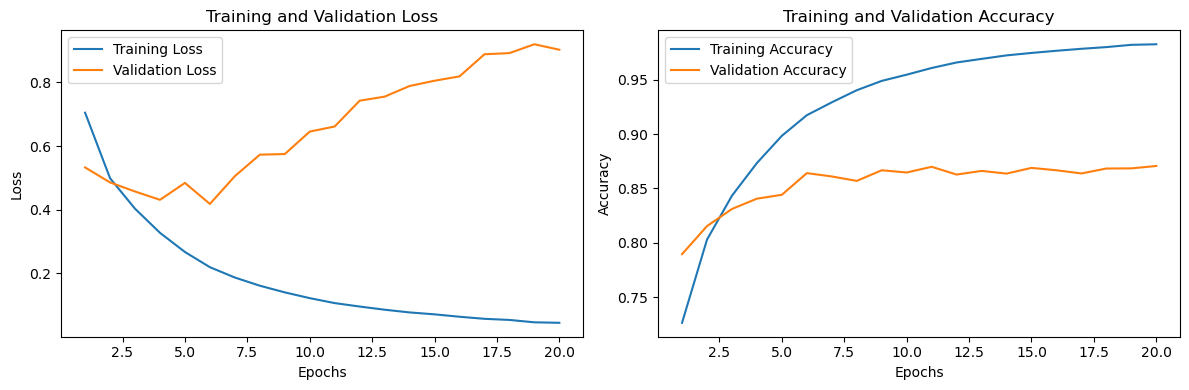

In [31]:
import matplotlib.pyplot as plt

# 그래프 그리기
epochs = range(1, epochs + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [32]:
# 모델 가중치 저장
torch.save(model.state_dict(), 'model/saved_Transformer_model_weights_0208T1600PM.pth')

In [33]:
# 모델 전체 저장
torch.save(model, 'model/saved_Transformer_model_020816002PM.pth')